## NFL Passers in 2018

In [43]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

In [44]:
df = pd.read_csv('NFL_2018_PASSING_MASTER.csv')

In [45]:
df.head()

,Rk,Player,Pos,Age,Lg,Tm,Opp,Home_Tm,Result,Points_for,...,Att,Cmp%,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A
0,1,Ryan Fitzpatrick,QB,35.289,NFL,TAM,NOR,NOR,W,48,...,28,75.00,417,4,0,156.2,0,0,14.89,17.75
1,2,Aaron Rodgers,QB,34.281,NFL,GNB,CHI,GNB,W,24,...,30,66.67,286,3,0,130.7,2,19,9.53,11.53
2,3,Drew Brees,QB,39.237,NFL,NOR,TAM,NOR,L,40,...,45,82.22,439,3,0,129.5,1,7,9.76,11.09
3,4,Patrick Mahomes,QB,22.357,NFL,KAN,LAC,LAC,W,38,...,27,55.56,256,4,0,127.5,1,0,9.48,12.44
4,5,Joe Flacco,QB,33.236,NFL,BAL,BUF,BAL,W,47,...,34,73.53,236,3,0,121.7,1,0,6.94,8.71


In [46]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Lg', 'Tm', 'Opp', 'Home_Tm', 'Result',
       'Points_for', 'Points_against', 'G#', 'Week', 'Day', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Sk', 'Yds.1', 'Y/A', 'AY/A'],
      dtype='object')

In [47]:
df.describe()

,Rk,Age,Points_for,Points_against,G#,Week,Cmp,Att,Cmp%,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,18.942122,28.662293,23.258842,23.344051,8.709003,9.255627,18.427653,28.409968,63.880209,209.432476,1.361736,0.673633,91.073312,2.053055,13.662379,7.848103,8.044357
std,10.828625,5.300716,10.571536,10.509743,4.594040,4.999574,9.706004,14.283334,19.581763,115.522719,1.235290,0.892578,31.186443,1.798751,12.870037,6.237264,9.039027
min,1.000000,21.097000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,-45.000000
25%,10.000000,24.179500,16.000000,16.000000,5.000000,5.000000,13.000000,22.000000,57.140000,136.250000,0.000000,0.000000,70.400000,1.000000,1.000000,5.772500,4.882500
50%,19.000000,28.302000,23.000000,23.000000,9.000000,9.500000,20.000000,31.000000,65.300000,222.000000,1.000000,0.000000,92.550000,2.000000,12.000000,7.110000,7.185000
75%,28.000000,32.219500,30.000000,30.000000,13.000000,14.000000,25.000000,38.000000,72.872500,286.750000,2.000000,1.000000,113.875000,3.000000,21.000000,8.677500,9.607500
max,44.000000,41.149000,54.000000,54.000000,16.000000,17.000000,42.000000,62.000000,100.000000,478.000000,6.000000,4.000000,158.300000,11.000000,71.000000,66.000000,86.000000


In [48]:
# Taking a closer look at average statistics for winners and losers, this may influence some additional
# feature engineering down the road

winners_losers = df.groupby('Result').mean()[['Age', 'Points_for', 'Points_against', 'Cmp', 'Att',
                                              'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Sk', 'Yds.1', 'Y/A', 'AY/A']]
winners_losers

,Age,Points_for,Points_against,Cmp,Att,Cmp%,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A
Result,,,,,,,,,,,,,,
L,28.505119,17.379421,29.205788,19.183280,30.524116,61.968617,207.151125,1.112540,0.906752,81.507717,2.463023,16.713826,6.982701,6.809164
T,32.386000,25.000000,25.000000,25.750000,42.750000,59.487500,309.500000,1.750000,1.250000,82.125000,4.250000,27.500000,7.160000,6.605000
W,28.772997,29.192182,17.384365,17.566775,26.081433,65.873941,210.439739,1.609121,0.429967,100.880130,1.609121,10.390879,8.733746,9.314397


In [49]:
corrmat = df.corr()
print(corrmat)

                      Rk       Age  Points_for  Points_against        G#  \
Rk              1.000000 -0.095529   -0.485597        0.044860  0.092918   
Age            -0.095529  1.000000    0.076341        0.023636 -0.055954   
Points_for     -0.485597  0.076341    1.000000       -0.064213 -0.061578   
Points_against  0.044860  0.023636   -0.064213        1.000000 -0.083071   
G#              0.092918 -0.055954   -0.061578       -0.083071  1.000000   
Week            0.092897 -0.049498   -0.058868       -0.083840  0.998176   
Cmp            -0.223163  0.237442    0.067345        0.147008 -0.159933   
Att            -0.056276  0.202330   -0.016402        0.174245 -0.157791   
Cmp%           -0.642121  0.095309    0.090081       -0.011692 -0.022001   
Yds            -0.388018  0.203891    0.248937        0.164300 -0.187793   
TD             -0.642122  0.122810    0.554869        0.138869 -0.137771   
Int             0.410391 -0.027582   -0.177732        0.217123 -0.085638   
Rate        

0.7551133781708611

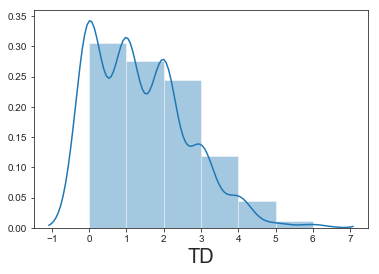

In [50]:
## Looking at TD distribution
sns.distplot(df['TD'], bins=6)

## Assessing skew
scipy.stats.skew(df['TD'], axis=0, bias=True)

In [51]:
# I suspect some non-QBs are represented in this list - let's check
a = df['Pos'].unique()
print(a)

['QB' 'WR' 'FS' 'RB' 'P' 'TE' 'K']


In [52]:
# The non-QB info might be useful for some other purposes, but I think it will skew my data
# ever so slightly, so I think I will just drop these values

df = df[df['Pos'] == 'QB']

In [53]:
# Just checking to see if that worked
b = df['Pos'].unique()
print(b)

# Perfecto

['QB']


0.6761071057563663

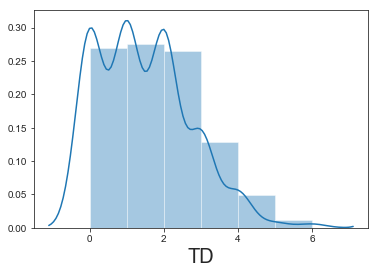

In [54]:
## Re-examining TD distribution
sns.distplot(df['TD'], bins=6)

## And skew
scipy.stats.skew(df['TD'], axis=0, bias=True)

In [55]:
# I'm also concerned that I have a bunch of backups in here who came in and threw a pass or two
# Let me get rid of those by setting some limitations

df = df[df['Att'] > 10]

In [56]:
# Let me check to see if that worked
c = df['Att'].unique()
print(c)

# Perfecto

[28 30 45 27 34 21 51 39 33 36 53 26 29 35 37 40 41 43 15 46 22 16 18 23
 48 32 42 60 44 20 25 31 55 49 38 24 19 50 14 62 58 47 52 59 54 56 61 17
 12 13 11]


0.6157512894236183

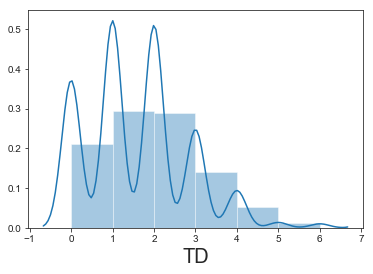

In [57]:
## Re-examining TD distribution
sns.distplot(df['TD'], bins=6)

## and skew
scipy.stats.skew(df['TD'], axis=0, bias=True)

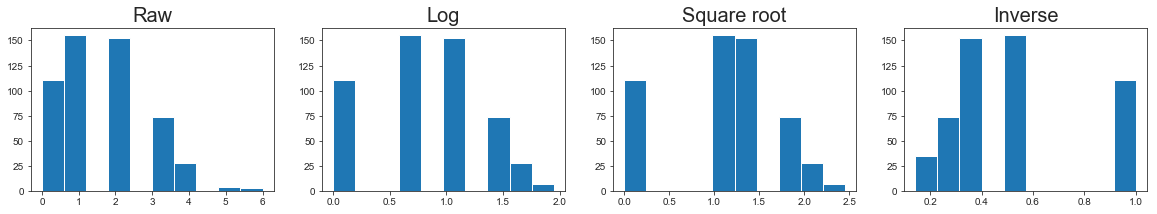

In [58]:
fig = plt.figure(figsize=(20,3))

fig.add_subplot(141)
plt.hist(df['TD'])
plt.title('Raw')

fig.add_subplot(142)
plt.hist(np.log(df['TD']+1))
plt.title('Log')

fig.add_subplot(143)
plt.hist(np.sqrt(df['TD']))
plt.title('Square root')

ax3=fig.add_subplot(144)
plt.hist(1/(df['TD']+1))
plt.title('Inverse')
plt.show()

# The square root transformation is closest to normal.

df['TD_sqrt'] = np.sqrt(df['TD'])

Text(0.5, 1.0, 'Touchdowns Across Weeks')

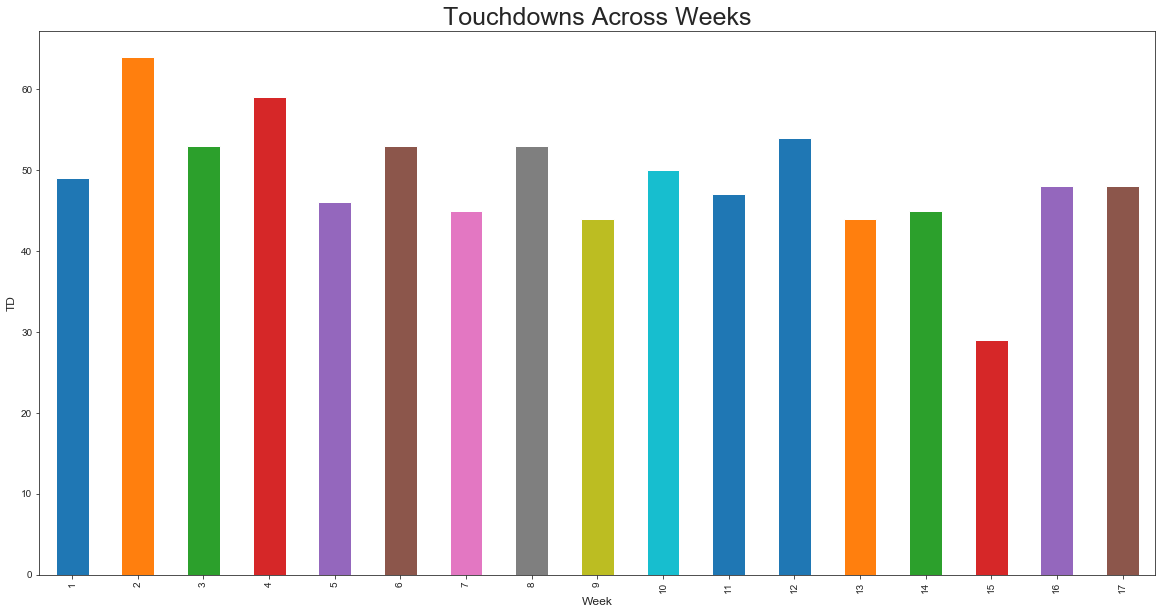

In [59]:
#Curious to visualize how league-wide touchdowns change over the course of the season

weekly_tds = df.groupby('Week')['TD'].sum()

weekly_tds.plot.bar(figsize = (20,10))
plt.xlabel('Week', fontsize = 12)
plt.ylabel('TD', fontsize = 12)
plt.title('Touchdowns Across Weeks', fontsize = 25)

In [60]:
weekly_tds.head()

Week
1    49
2    64
3    53
4    59
5    46
Name: TD, dtype: int64

/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


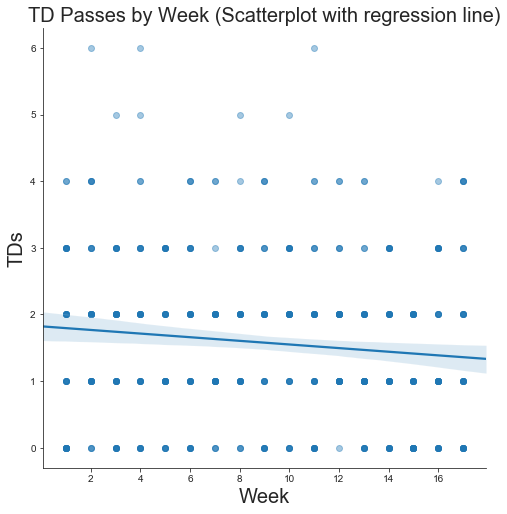

In [61]:
# Let's look at this in a different way
g = sns.lmplot(y='TD', 
               x='Week',
               data=df,
               size=7,
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("TDs")
g.set_xlabels("Week")
plt.title('TD Passes by Week (Scatterplot with regression line)')
plt.show()

# Unsurprisingly, the air game is less of a threat as the season advances

0.6157512894236183

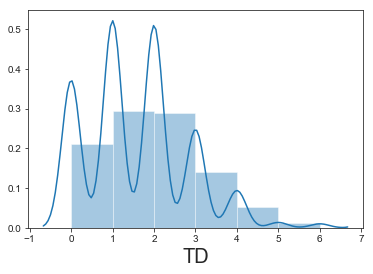

In [62]:
# Looking to see whether TDs are normally distributed - for ease of comparison
sns.distplot(df['TD'], bins=6)

# And skew
scipy.stats.skew(df['TD'], axis=0, bias=True)

-0.5852223121810458

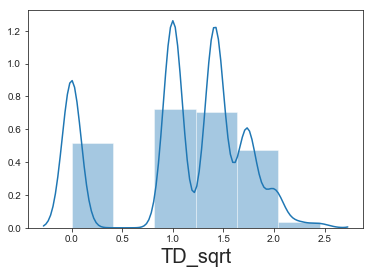

In [63]:
## After transformation, I hope to get less skew
sns.distplot(df['TD_sqrt'], bins=6)

# just a bit more!
scipy.stats.skew(df['TD_sqrt'], axis=0, bias=True)

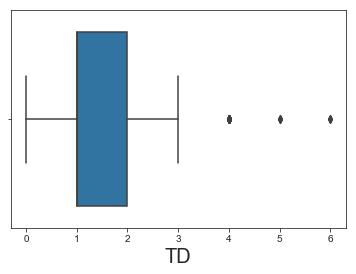

In [64]:
sns.boxplot(df['TD'])

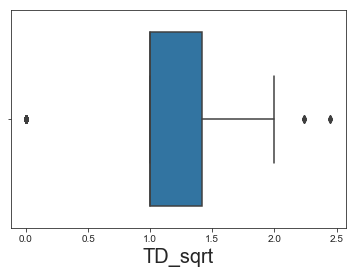

In [65]:
sns.boxplot(df['TD_sqrt'])

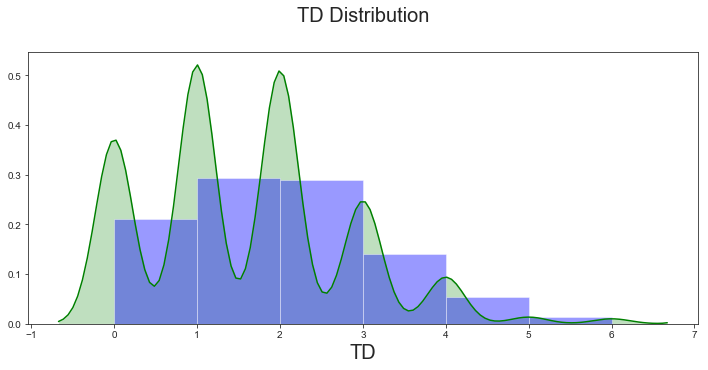

In [66]:
# Looking at this distribution in a different way
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
sns.set_style('ticks', {'xtick.major.size': 0.2})

g = plt.figure(figsize=(12,5))
plt.title('TD Distribution', y=1.09)

axes = sns.distplot(df['TD'], hist=True, bins=6, color='b', 
                    kde_kws={'shade':True,'color':'g'})

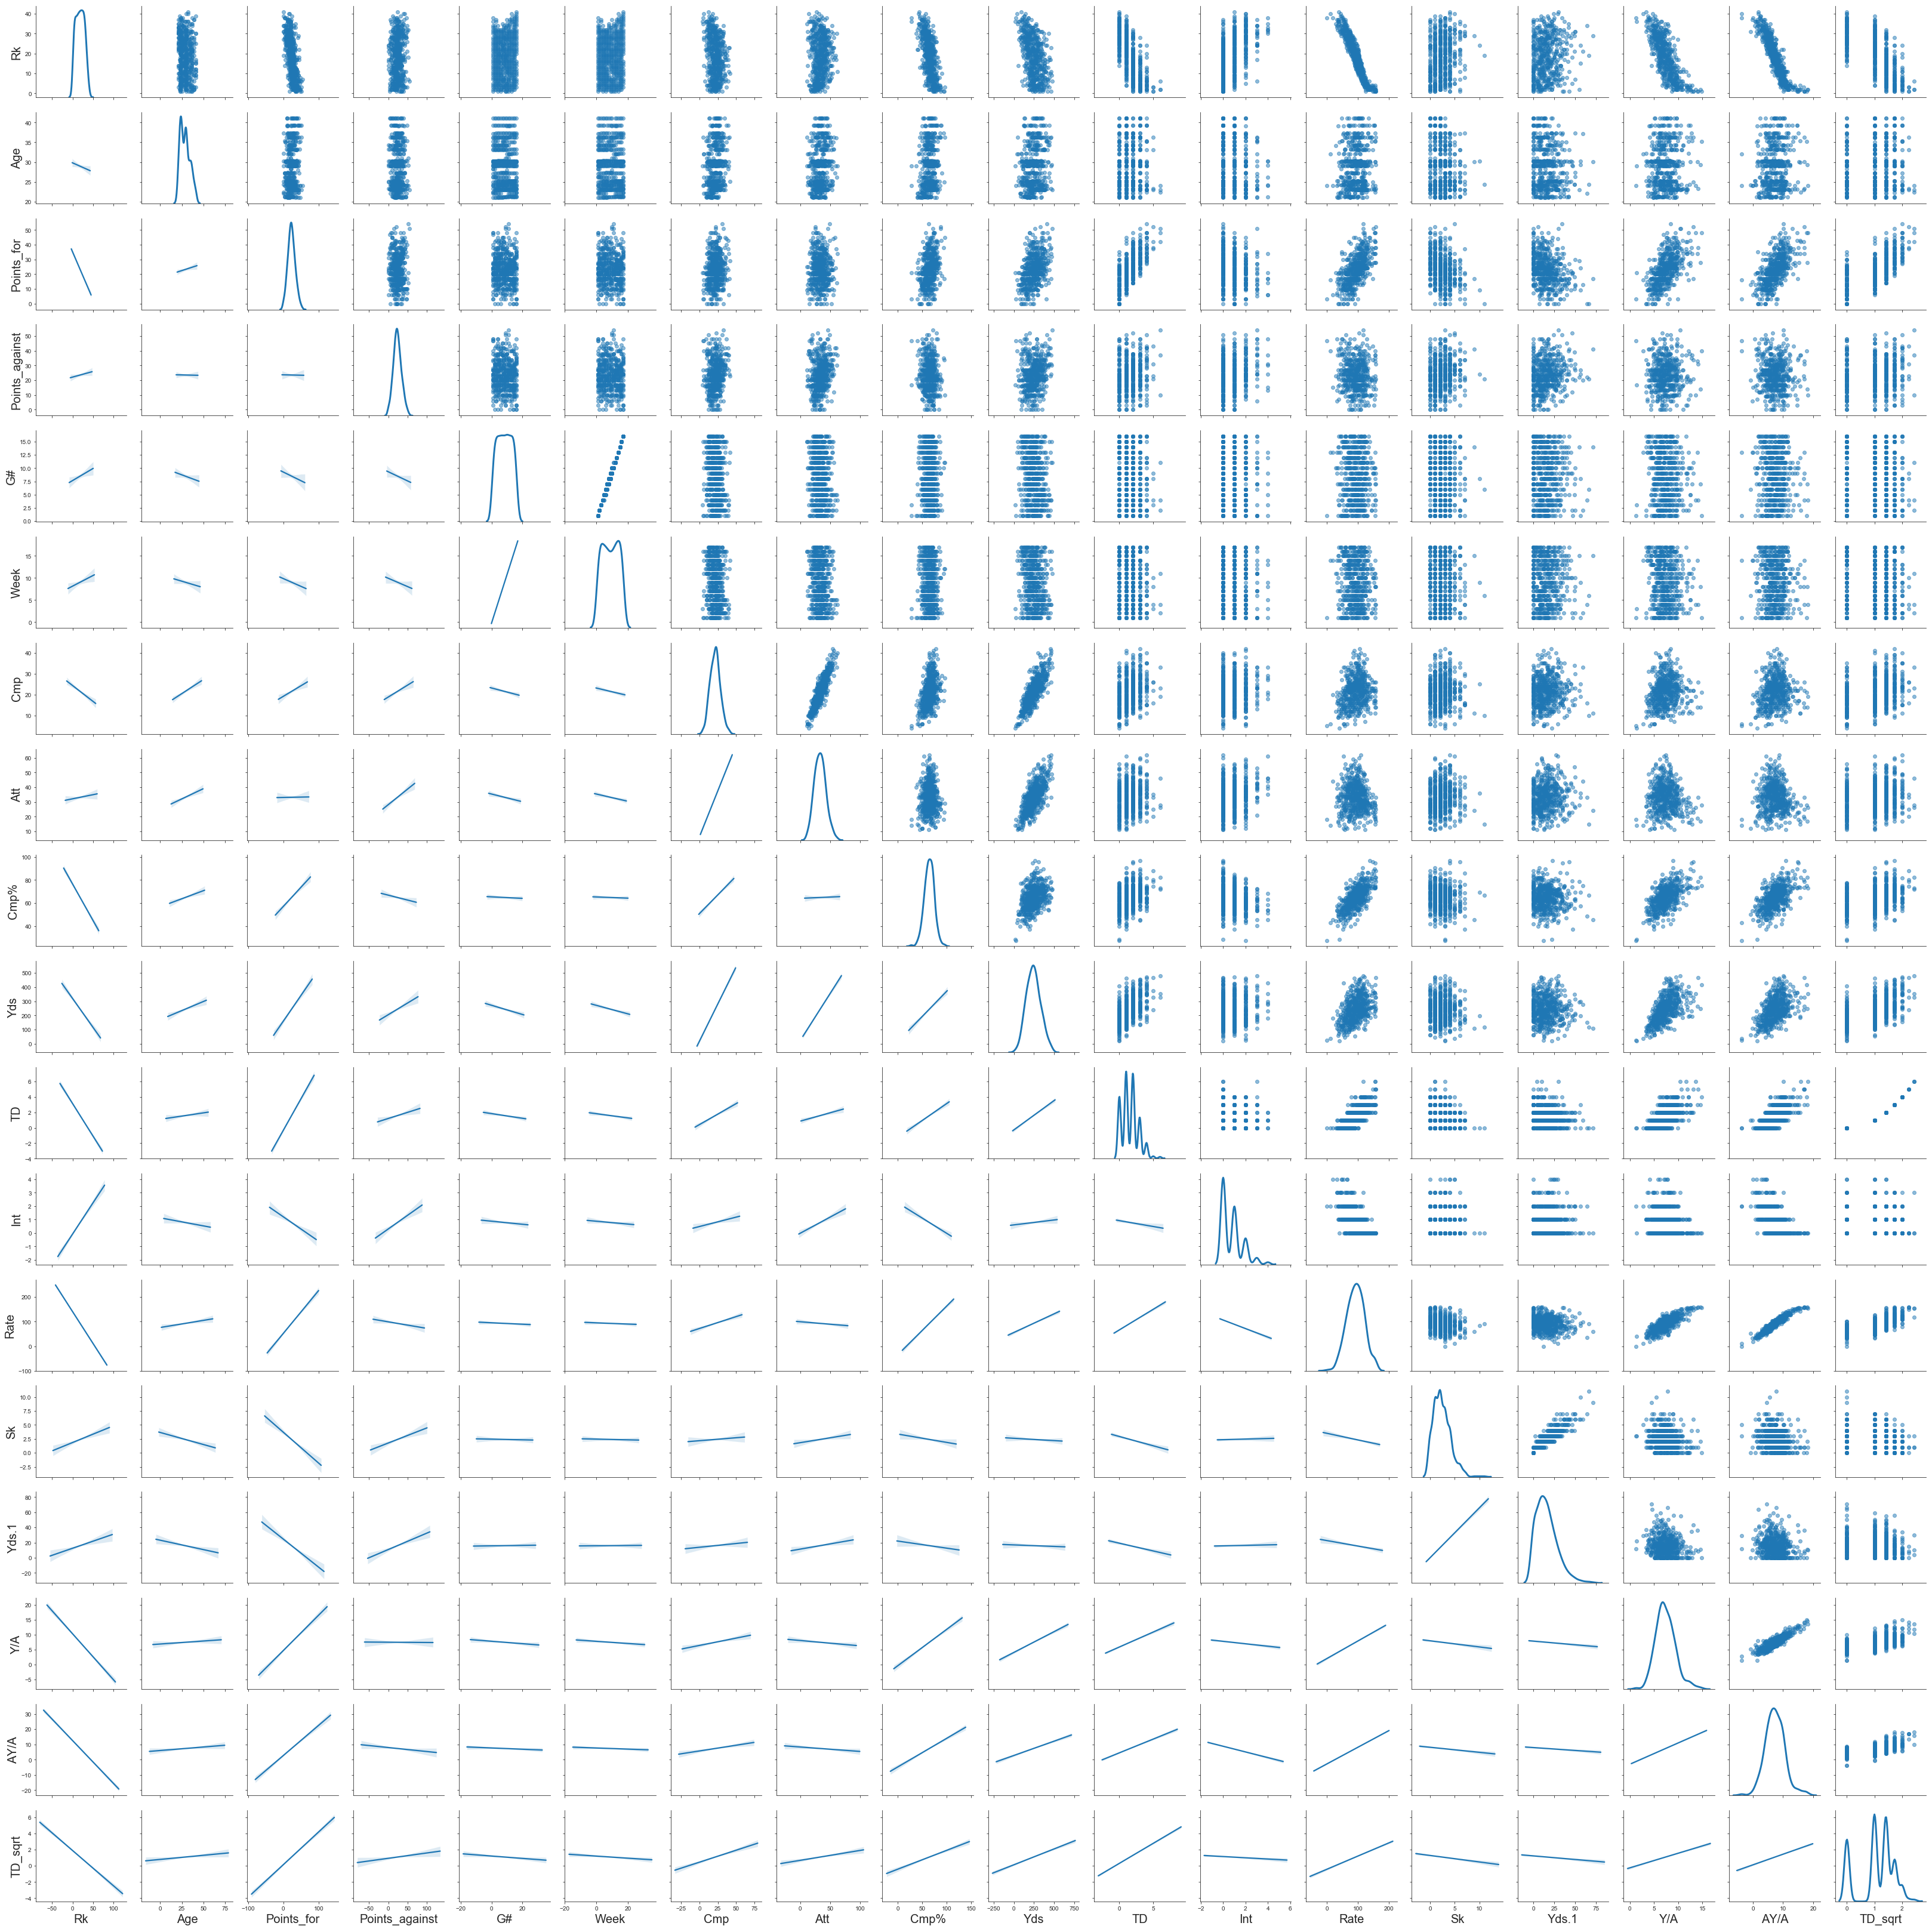

In [67]:
## Maybe I should explore this once I have reduced the number of features

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [68]:
corrmat = df.corr()
print(corrmat)

                      Rk       Age  Points_for  Points_against        G#  \
Rk              1.000000 -0.085997   -0.638052        0.075060  0.100884   
Age            -0.085997  1.000000    0.100051       -0.006980 -0.071498   
Points_for     -0.638052  0.100051    1.000000       -0.005352 -0.073026   
Points_against  0.075060 -0.006980   -0.005352        1.000000 -0.078121   
G#              0.100884 -0.071498   -0.073026       -0.078121  1.000000   
Week            0.097921 -0.063232   -0.072142       -0.078159  0.998215   
Cmp            -0.225161  0.212800    0.151437        0.172657 -0.128861   
Att             0.060044  0.158673    0.005067        0.230887 -0.125209   
Cmp%           -0.646801  0.152634    0.342664       -0.088762 -0.030011   
Yds            -0.472386  0.158308    0.423838        0.194956 -0.168689   
TD             -0.710199  0.074935    0.692750        0.136173 -0.114305   
Int             0.514273 -0.070627   -0.202493        0.229643 -0.056523   
Rate        

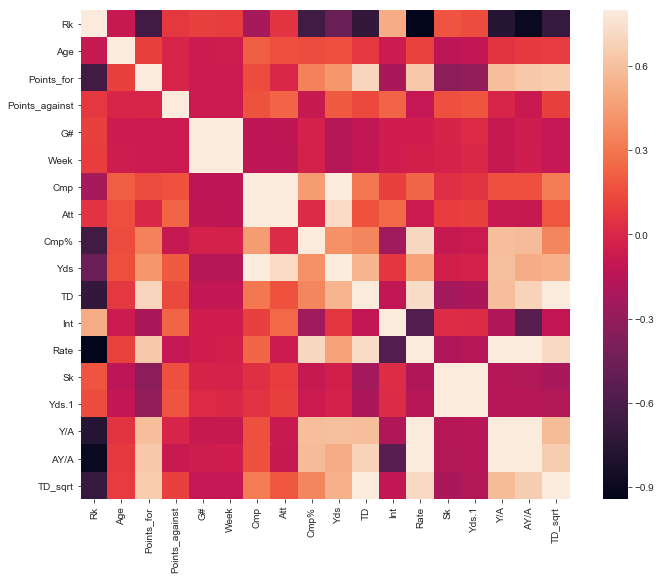

In [69]:
# Checking out a heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

#### Looks like we have a few highly correlated variables that we may want to work to combine or eliminate

+ Yards per attempt and average yards per attempt (drop one of them?)
+ Sacks and yards lost (maybe drop yards lost)
+ Completions and attempts seem to be highly correlated, maybe we drop the completion number because we have completion percentage
+ Game and week seem to be somewhat redundant (probably want to drop game)

### KNN

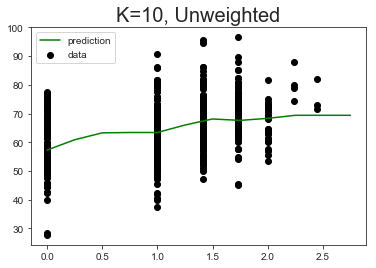

In [70]:
from sklearn import neighbors

# build our model
knn_uw = neighbors.KNeighborsRegressor(n_neighbors=32)
X = pd.DataFrame(df.TD_sqrt)
Y = df['Cmp%']
knn_uw.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 3, 0.25)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn_uw.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

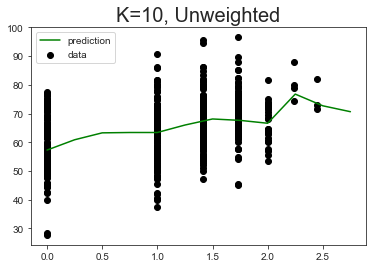

In [71]:
# build our model
knn_w = neighbors.KNeighborsRegressor(n_neighbors=32, weights = 'distance')
X = pd.DataFrame(df.TD_sqrt)
Y = df['Cmp%']
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 3, 0.25)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [72]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_uw, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

## Looks like completion percentage and touchdowns aren't enough for me to generate strong predictions

Unweighted Accuracy: 0.09 (+/- 0.12)
Weighted Accuracy: 0.10 (+/- 0.14)


##### KNN as a classifier...

In [73]:
KNNC_df = df
KNNC_df.head()

,Rk,Player,Pos,Age,Lg,Tm,Opp,Home_Tm,Result,Points_for,...,Cmp%,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A,TD_sqrt
0,1,Ryan Fitzpatrick,QB,35.289,NFL,TAM,NOR,NOR,W,48,...,75.00,417,4,0,156.2,0,0,14.89,17.75,2.000000
1,2,Aaron Rodgers,QB,34.281,NFL,GNB,CHI,GNB,W,24,...,66.67,286,3,0,130.7,2,19,9.53,11.53,1.732051
2,3,Drew Brees,QB,39.237,NFL,NOR,TAM,NOR,L,40,...,82.22,439,3,0,129.5,1,7,9.76,11.09,1.732051
3,4,Patrick Mahomes,QB,22.357,NFL,KAN,LAC,LAC,W,38,...,55.56,256,4,0,127.5,1,0,9.48,12.44,2.000000
4,5,Joe Flacco,QB,33.236,NFL,BAL,BUF,BAL,W,47,...,73.53,236,3,0,121.7,1,0,6.94,8.71,1.732051


In [74]:
# Does the QB play on the home team?
KNNC_df['winner'] = np.where(KNNC_df['Result'] == 'W', 1, 0)

KNNC_df.head()

,Rk,Player,Pos,Age,Lg,Tm,Opp,Home_Tm,Result,Points_for,...,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A,TD_sqrt,winner
0,1,Ryan Fitzpatrick,QB,35.289,NFL,TAM,NOR,NOR,W,48,...,417,4,0,156.2,0,0,14.89,17.75,2.000000,1
1,2,Aaron Rodgers,QB,34.281,NFL,GNB,CHI,GNB,W,24,...,286,3,0,130.7,2,19,9.53,11.53,1.732051,1
2,3,Drew Brees,QB,39.237,NFL,NOR,TAM,NOR,L,40,...,439,3,0,129.5,1,7,9.76,11.09,1.732051,0
3,4,Patrick Mahomes,QB,22.357,NFL,KAN,LAC,LAC,W,38,...,256,4,0,127.5,1,0,9.48,12.44,2.000000,1
4,5,Joe Flacco,QB,33.236,NFL,BAL,BUF,BAL,W,47,...,236,3,0,121.7,1,0,6.94,8.71,1.732051,1


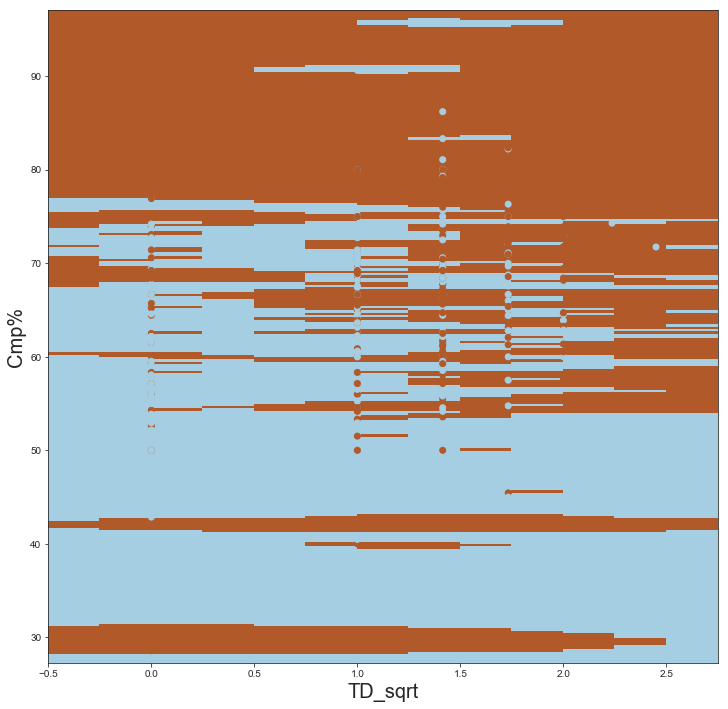

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=10, weights='distance')

X = KNNC_df[['TD_sqrt', 'Cmp%']]

# Fit our model.
Y = KNNC_df.winner
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 0.25

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 12))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('TD_sqrt')
plt.ylabel('Cmp%')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [80]:
score_KNNC = cross_val_score(neighbors, X, Y, cv=5)
print(score_KNNC)

[0.57009346 0.6        0.55238095 0.56190476 0.4952381 ]


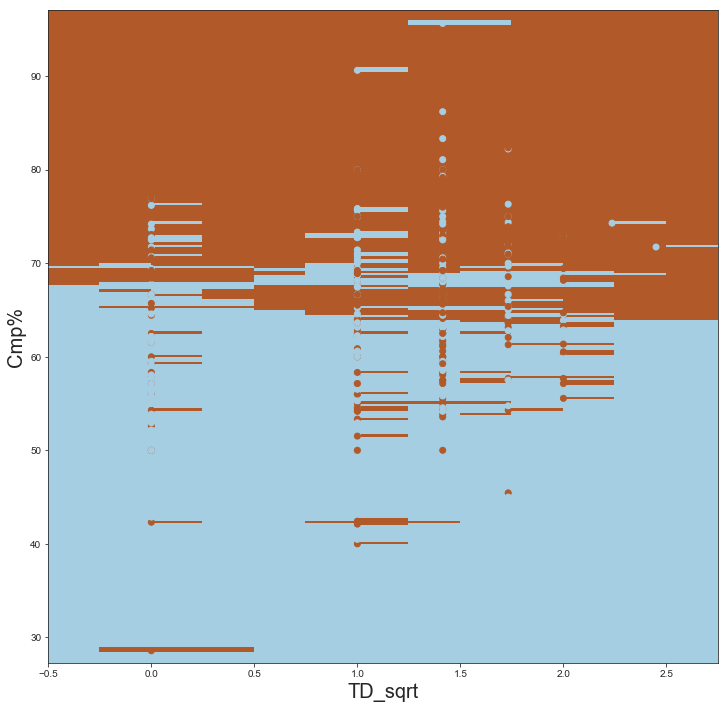

In [81]:
neighbors = KNeighborsClassifier(n_neighbors=100, weights='distance')

X = KNNC_df[['TD_sqrt', 'Cmp%']]

# Fit our model.
Y = KNNC_df.winner
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 0.25

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 12))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('TD_sqrt')
plt.ylabel('Cmp%')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [82]:
score_KNNC = cross_val_score(neighbors, X, Y, cv=5)
print(score_KNNC)

[0.59813084 0.58095238 0.59047619 0.59047619 0.52380952]


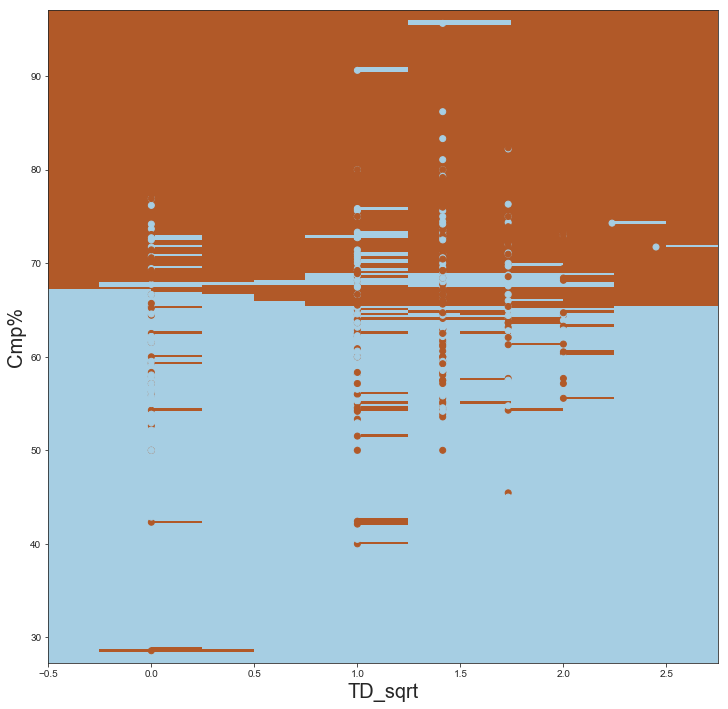

In [83]:
neighbors = KNeighborsClassifier(n_neighbors=200, weights='distance')

X = KNNC_df[['TD_sqrt', 'Cmp%']]

# Fit our model.
Y = KNNC_df.winner
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 0.25

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 12))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('TD_sqrt')
plt.ylabel('Cmp%')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [86]:
score_KNNC = cross_val_score(neighbors, X, Y, cv=5)
print(score_KNNC)

[0.59813084 0.6        0.6        0.60952381 0.52380952]


##### Increasing the number of neighbors is improving the accuracy of the model

In [87]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

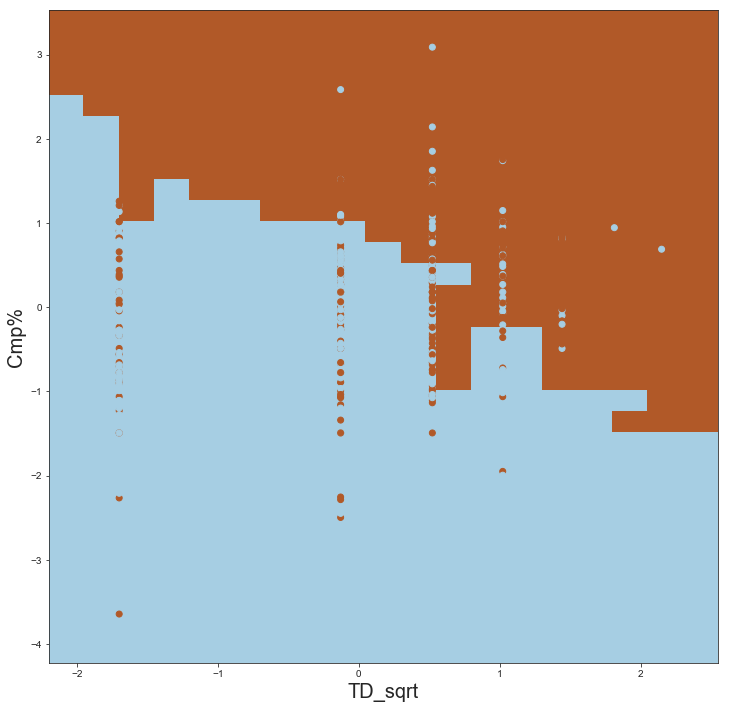

In [88]:
zscore_neighbors = KNeighborsClassifier(n_neighbors=200, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.

X = pd.DataFrame({
    'TD_sqrt': stats.zscore(KNNC_df.TD_sqrt),
    'Cmp%': stats.zscore(KNNC_df['Cmp%'])
})


# Fit our model.
Y = KNNC_df.winner
zscore_neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 0.25

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = zscore_neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 12))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('TD_sqrt')
plt.ylabel('Cmp%')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [90]:
score_KNNCz = cross_val_score(zscore_neighbors, X, Y, cv=5)
print(score_KNNCz)

[0.62616822 0.58095238 0.56190476 0.58095238 0.54285714]


##### Looking at the z-scores doesn't have a huge impact on my accuracy

### Logistic Regression

In [91]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Lg', 'Tm', 'Opp', 'Home_Tm', 'Result',
       'Points_for', 'Points_against', 'G#', 'Week', 'Day', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Sk', 'Yds.1', 'Y/A', 'AY/A',
       'TD_sqrt', 'winner'],
      dtype='object')

In [92]:
df.dtypes

Rk                  int64
Player             object
Pos                object
Age               float64
Lg                 object
Tm                 object
Opp                object
Home_Tm            object
Result             object
Points_for          int64
Points_against      int64
G#                  int64
Week                int64
Day                object
Cmp                 int64
Att                 int64
Cmp%              float64
Yds                 int64
TD                  int64
Int                 int64
Rate              float64
Sk                  int64
Yds.1               int64
Y/A               float64
AY/A              float64
TD_sqrt           float64
winner              int64
dtype: object

In [93]:
features = df[['Age', 'Points_for', 'Points_against', 'Week', 'Att',
               'Cmp%', 'Yds', 'Int', 'Rate', 'Sk', 'Y/A', 'TD_sqrt']]

features.head()

,Age,Points_for,Points_against,Week,Att,Cmp%,Yds,Int,Rate,Sk,Y/A,TD_sqrt
0,35.289,48,40,1,28,75.00,417,0,156.2,0,14.89,2.000000
1,34.281,24,23,1,30,66.67,286,0,130.7,2,9.53,1.732051
2,39.237,40,48,1,45,82.22,439,0,129.5,1,9.76,1.732051
3,22.357,38,28,1,27,55.56,256,0,127.5,1,9.48,2.000000
4,33.236,47,3,1,34,73.53,236,0,121.7,1,6.94,1.732051


In [94]:
# logistic regression classifier (SKlearn)
# parameter regularization coefficient c

## Trying to predict the winner

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e50)
X = features[['Age', 'Points_against', 'Week', 'Att',
              'Cmp%', 'Yds', 'Int', 'Sk', 'Y/A']]
y = df['TD']

# fit the model
fit = lr.fit(X, y)

# Display
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by game outcome')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[-5.41163428e-03 -2.27696696e-02  1.01245567e-03 -4.68740852e-02
  -6.78298000e-06 -5.07593936e-04  1.64937511e-01  1.96991116e-01
  -7.86645580e-01]
 [-4.15809029e-04 -1.25989359e-02  1.50197912e-02  6.30576476e-02
  -1.22775086e-03 -1.08194558e-02  2.10105360e-01  1.66814765e-02
   1.30734506e-01]
 [-6.40905712e-03 -9.36690317e-03 -7.98415590e-03  9.03436069e-02
   8.98066259e-03 -8.18686047e-03 -2.02140486e-01  8.81892607e-02
   4.42488286e-01]
 [ 2.61284781e-02  1.84875800e-02 -1.07189166e-02 -1.80010815e-02
   2.03475559e-02  8.38693944e-03 -1.38673951e-01 -3.14959323e-01
   1.11089170e-01]
 [-1.85027625e-02  2.02633415e-02  1.21915581e-02 -7.76902004e-02
  -6.31566434e-02  2.15790469e-02 -3.37666797e-01 -5.66298953e-01
  -8.01573317e-02]
 [-7.51958162e-02  6.93173623e-02  4.56643733e-02 -3.87128761e-01
   1.21734100e-01  4.21021249e-02 -6.55003472e+00 -5.25800339e-01
  -4.58764721e-01]
 [-3.44180331e+00 -3.64639607e-03 -7.00708181e-01  1.86498500e+00
   4.19252773e-

In [95]:
corrmat2 = features.corr()
print(corrmat2)

                     Age  Points_for  Points_against      Week       Att  \
Age             1.000000    0.100051       -0.006980 -0.063232  0.158673   
Points_for      0.100051    1.000000       -0.005352 -0.072142  0.005067   
Points_against -0.006980   -0.005352        1.000000 -0.078159  0.230887   
Week           -0.063232   -0.072142       -0.078159  1.000000 -0.129350   
Att             0.158673    0.005067        0.230887 -0.129350  1.000000   
Cmp%            0.152634    0.342664       -0.088762 -0.025938  0.021265   
Yds             0.158308    0.423838        0.194956 -0.171448  0.720956   
Int            -0.070627   -0.202493        0.229643 -0.057307  0.249194   
Rate            0.112571    0.640156       -0.099396 -0.044545 -0.069471   
Sk             -0.135950   -0.329302        0.163326 -0.018381  0.096794   
Y/A             0.053487    0.595378       -0.004635 -0.088748 -0.083756   
TD_sqrt         0.086750    0.651958        0.107834 -0.101456  0.183668   

           

### Random Forest

In [96]:
## Trying to predict the number of points scored

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier 

rfc = ensemble.RandomForestRegressor(n_estimators=300)

X = features[['Age', 'Points_against', 'Week', 'Att',
              'Cmp%', 'Yds', 'Int', 'Sk', 'Y/A']]
Y = df['TD']

from sklearn.model_selection import cross_val_score

score = cross_val_score(rfc, X, Y, cv=5)
print(score)
print('Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

[0.41386265 0.173014   0.39010674 0.1952526  0.43894639]
Accuracy: 0.32 (+/- 0.23)


In [97]:
rf_class = RandomForestClassifier()
rf_class.fit(X, Y)

feature_importances = pd.DataFrame(rf_class.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                importance
Yds               0.170093
Y/A               0.159711
Age               0.137679
Points_against    0.109134
Cmp%              0.108335
Att               0.104916
Week              0.101940
Sk                0.076467
Int               0.031725


In [98]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Lg', 'Tm', 'Opp', 'Home_Tm', 'Result',
       'Points_for', 'Points_against', 'G#', 'Week', 'Day', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'Int', 'Rate', 'Sk', 'Yds.1', 'Y/A', 'AY/A',
       'TD_sqrt', 'winner'],
      dtype='object')

In [99]:
df.head()

,Rk,Player,Pos,Age,Lg,Tm,Opp,Home_Tm,Result,Points_for,...,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A,TD_sqrt,winner
0,1,Ryan Fitzpatrick,QB,35.289,NFL,TAM,NOR,NOR,W,48,...,417,4,0,156.2,0,0,14.89,17.75,2.000000,1
1,2,Aaron Rodgers,QB,34.281,NFL,GNB,CHI,GNB,W,24,...,286,3,0,130.7,2,19,9.53,11.53,1.732051,1
2,3,Drew Brees,QB,39.237,NFL,NOR,TAM,NOR,L,40,...,439,3,0,129.5,1,7,9.76,11.09,1.732051,0
3,4,Patrick Mahomes,QB,22.357,NFL,KAN,LAC,LAC,W,38,...,256,4,0,127.5,1,0,9.48,12.44,2.000000,1
4,5,Joe Flacco,QB,33.236,NFL,BAL,BUF,BAL,W,47,...,236,3,0,121.7,1,0,6.94,8.71,1.732051,1


### Additional feature engineering

In [100]:
# Does the QB play on the home team?
features['QB_home'] = np.where(df['Tm'] == df['Home_Tm'], 1, 0)

# Do they complete more than 60% of their passes?
features['cmp_success'] = np.where(df['Cmp%'] > 60.0, 1, 0)

# Did they throw an INT?
features['int_thrown'] = np.where(df['Int'] > 0, 1, 0)

# Did they take more than 2 sacks?
features['too_many_sacks'] = np.where(df['Sk'] > 2, 1, 0)

# Are they a veteran over the age of 30
features['veteran_status'] = np.where(df['Age'] > 30, 1, 0)

# Did they win? (this will come in handy for a new random forest target)
df['winner'] = np.where(df['Result'] == 'W', 1, 0)

features.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,Age,Points_for,Points_against,Week,Att,Cmp%,Yds,Int,Rate,Sk,Y/A,TD_sqrt,QB_home,cmp_success,int_thrown,too_many_sacks,veteran_status
0,35.289,48,40,1,28,75.00,417,0,156.2,0,14.89,2.000000,0,1,0,0,1
1,34.281,24,23,1,30,66.67,286,0,130.7,2,9.53,1.732051,1,1,0,0,1
2,39.237,40,48,1,45,82.22,439,0,129.5,1,9.76,1.732051,1,1,0,0,1
3,22.357,38,28,1,27,55.56,256,0,127.5,1,9.48,2.000000,0,0,0,0,0
4,33.236,47,3,1,34,73.53,236,0,121.7,1,6.94,1.732051,1,1,0,0,1


#### Back to Random Forest, but this time trying to predict winners...

In [101]:
# Let's try it with the full feature set

rfc_winner = ensemble.RandomForestClassifier(n_estimators=300)

X_winner = features
Y_winner = df['winner']

score_winner = cross_val_score(rfc_winner, X_winner, Y_winner, cv=10)
print(score_winner)
print('Accuracy: %0.2f (+/- %0.2f)' % (score_winner.mean(), score_winner.std() * 2))

#Clearly this should be buoyed by Points_for and Points_against

[0.92592593 0.90566038 0.88679245 0.96226415 0.96226415 0.9245283
 0.94230769 0.94230769 0.84615385 0.92307692]
Accuracy: 0.92 (+/- 0.07)


In [102]:
# Can i reduce the features and still maintain high accuracy?
rfc_winner = ensemble.RandomForestClassifier(n_estimators=300)

X_winner = features[['Att', 'Cmp%', 'Yds', 'Y/A', 'TD_sqrt', 'QB_home',
                    'cmp_success', 'int_thrown', 'too_many_sacks', 'veteran_status']]
Y_winner = df['winner']

score_winner = cross_val_score(rfc_winner, X_winner, Y_winner, cv=10)
print(score_winner)
print('Accuracy: %0.2f (+/- %0.2f)' % (score_winner.mean(), score_winner.std() * 2))

## Not bad, but still can do better

[0.75925926 0.69811321 0.67924528 0.62264151 0.73584906 0.67924528
 0.71153846 0.61538462 0.67307692 0.65384615]
Accuracy: 0.68 (+/- 0.09)


In [104]:
# Adding Points_against back in...
rfc_winner = ensemble.RandomForestClassifier(n_estimators=300)

X_winner = features[['Att', 'Points_against', 'Cmp%', 'Yds', 'Y/A', 'TD_sqrt', 'QB_home',
                    'cmp_success', 'int_thrown', 'too_many_sacks', 'veteran_status']]
Y_winner = df['winner']

score_winner = cross_val_score(rfc_winner, X_winner, Y_winner, cv=10)
print(score_winner)
print('Accuracy: %0.2f (+/- %0.2f)' % (score_winner.mean(), score_winner.std() * 2))

## But even adding just a degree of context in the form of Points_against improves accuracy greatly

[0.83333333 0.79245283 0.75471698 0.71698113 0.8490566  0.71698113
 0.84615385 0.82692308 0.90384615 0.82692308]
Accuracy: 0.81 (+/- 0.12)


In [107]:
# Increasing the number of estimators
rfc_winner = ensemble.RandomForestClassifier(n_estimators=750)

X_winner = features[['Att', 'Points_against', 'Cmp%', 'Yds', 'Y/A', 'TD_sqrt', 'QB_home',
                    'cmp_success', 'int_thrown', 'too_many_sacks', 'veteran_status']]
Y_winner = df['winner']

score_winner = cross_val_score(rfc_winner, X_winner, Y_winner, cv=10)
print(score_winner)
print('Accuracy: %0.2f (+/- %0.2f)' % (score_winner.mean(), score_winner.std() * 2))

[0.85185185 0.77358491 0.75471698 0.69811321 0.8490566  0.73584906
 0.82692308 0.80769231 0.90384615 0.80769231]
Accuracy: 0.80 (+/- 0.12)


In [109]:
# Not a big difference between 300 and 750 estimators, what if I reduce it?
rfc_winner = ensemble.RandomForestClassifier(n_estimators=50)

X_winner = features[['Att', 'Points_against', 'Cmp%', 'Yds', 'Y/A', 'TD_sqrt', 'QB_home',
                    'cmp_success', 'int_thrown', 'too_many_sacks', 'veteran_status']]
Y_winner = df['winner']

score_winner = cross_val_score(rfc_winner, X_winner, Y_winner, cv=10)
print(score_winner)
print('Accuracy: %0.2f (+/- %0.2f)' % (score_winner.mean(), score_winner.std() * 2))

[0.81481481 0.81132075 0.75471698 0.71698113 0.86792453 0.75471698
 0.82692308 0.78846154 0.84615385 0.80769231]
Accuracy: 0.80 (+/- 0.09)


#### Based on the series of random forest models that ran above, it is clear that a team's QB play doesn't move the needle much when it comes to predicting whether their team wins. Adding Points_against back into our model gave us the kind of context we need to boost that accuracy

#### Clearly, however, the number of estimators in the model isn't really moving the needle much when it comes to my accuracy scores

#### Below, I'll try to manipulate the data set to determine how QBs played against each other, creating new features based on the differences in their statistical performance

In [110]:
## Create two datasets; one winner and one loser

data_win = df[df['Result'] == 'W']
data_lose = df[df['Result'] == 'L']

data_win.head()

,Rk,Player,Pos,Age,Lg,Tm,Opp,Home_Tm,Result,Points_for,...,Yds,TD,Int,Rate,Sk,Yds.1,Y/A,AY/A,TD_sqrt,winner
0,1,Ryan Fitzpatrick,QB,35.289,NFL,TAM,NOR,NOR,W,48,...,417,4,0,156.2,0,0,14.89,17.75,2.000000,1
1,2,Aaron Rodgers,QB,34.281,NFL,GNB,CHI,GNB,W,24,...,286,3,0,130.7,2,19,9.53,11.53,1.732051,1
3,4,Patrick Mahomes,QB,22.357,NFL,KAN,LAC,LAC,W,38,...,256,4,0,127.5,1,0,9.48,12.44,2.000000,1
4,5,Joe Flacco,QB,33.236,NFL,BAL,BUF,BAL,W,47,...,236,3,0,121.7,1,0,6.94,8.71,1.732051,1
6,7,Alex Smith,QB,34.125,NFL,WAS,ARI,ARI,W,24,...,255,2,0,118.1,3,8,8.50,9.83,1.414214,1


In [111]:
data = pd.merge(df, data_lose, left_on = ['Week', 'Tm'], right_on = ['Week', 'Opp'])
data[['Week', 'Tm_x', 'Player_x', 'Result_x', 'Opp_x', 'Player_y', 'Result_y', 'Opp_y', 'Tm_y']]

,Week,Tm_x,Player_x,Result_x,Opp_x,Player_y,Result_y,Opp_y,Tm_y
0,1,TAM,Ryan Fitzpatrick,W,NOR,Drew Brees,L,TAM,NOR
1,1,GNB,Aaron Rodgers,W,CHI,Mitchell Trubisky,L,GNB,CHI
2,1,KAN,Patrick Mahomes,W,LAC,Philip Rivers,L,KAN,LAC
3,1,BAL,Joe Flacco,W,BUF,Josh Allen,L,BAL,BUF
4,1,BAL,Joe Flacco,W,BUF,Nathan Peterman,L,BAL,BUF
5,1,WAS,Alex Smith,W,ARI,Sam Bradford,L,WAS,ARI
6,1,NYJ,Sam Darnold,W,DET,Matthew Stafford,L,NYJ,DET
7,1,CIN,Andy Dalton,W,IND,Andrew Luck,L,CIN,IND
8,1,NWE,Tom Brady,W,HOU,Deshaun Watson,L,NWE,HOU
9,1,LAR,Jared Goff,W,OAK,Derek Carr,L,LAR,OAK


In [112]:
data.head()

,Rk_x,Player_x,Pos_x,Age_x,Lg_x,Tm_x,Opp_x,Home_Tm_x,Result_x,Points_for_x,...,Yds_y,TD_y,Int_y,Rate_y,Sk_y,Yds.1_y,Y/A_y,AY/A_y,TD_sqrt_y,winner_y
0,1,Ryan Fitzpatrick,QB,35.289,NFL,TAM,NOR,NOR,W,48,...,439,3,0,129.5,1,7,9.76,11.09,1.732051,0
1,2,Aaron Rodgers,QB,34.281,NFL,GNB,CHI,GNB,W,24,...,171,0,0,77.2,4,16,4.89,4.89,0.000000,0
2,4,Patrick Mahomes,QB,22.357,NFL,KAN,LAC,LAC,W,38,...,424,3,1,103.7,1,6,8.31,8.61,1.732051,0
3,5,Joe Flacco,QB,33.236,NFL,BAL,BUF,BAL,W,47,...,74,0,0,56.0,3,16,4.93,4.93,0.000000,0
4,5,Joe Flacco,QB,33.236,NFL,BAL,BUF,BAL,W,47,...,24,0,2,0.0,3,12,1.33,-3.67,0.000000,0


In [113]:
## Some new feature engineering

features['Cmp%_dif'] = data['Cmp%_x'] - data['Cmp%_y'] +0.01
features['Rate_dif'] = data['Rate_x'] - data['Rate_y'] +0.01

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [114]:
features.head()

,Age,Points_for,Points_against,Week,Att,Cmp%,Yds,Int,Rate,Sk,Y/A,TD_sqrt,QB_home,cmp_success,int_thrown,too_many_sacks,veteran_status,Cmp%_dif,Rate_dif
0,35.289,48,40,1,28,75.00,417,0,156.2,0,14.89,2.000000,0,1,0,0,1,-7.21,26.71
1,34.281,24,23,1,30,66.67,286,0,130.7,2,9.53,1.732051,1,1,0,0,1,0.97,53.51
2,39.237,40,48,1,45,82.22,439,0,129.5,1,9.76,1.732051,1,1,0,0,1,-11.10,23.81
3,22.357,38,28,1,27,55.56,256,0,127.5,1,9.48,2.000000,0,0,0,0,0,33.54,65.71
4,33.236,47,3,1,34,73.53,236,0,121.7,1,6.94,1.732051,1,1,0,0,1,45.76,121.71
